# Exercise -Use of KMeans 

In [1]:
import os
import pandas as pd
import numpy as np
os.chdir("F:/R_Working_Directory")

In [2]:
pd.options.display.max_columns = None

In [3]:
data=pd.read_csv("snsdata.csv",sep=",")

In [4]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24914 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


In [6]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [7]:
from collections import Counter
Counter(data["gradyear"])

Counter({2006: 7500, 2007: 7500, 2008: 7500, 2009: 7500})

In [16]:
age_avg=data.groupby("gradyear").aggregate({"age":np.mean})

In [9]:
#To check the average age for each gradyear
age_avg

,age
gradyear,
2006,19.137241
2007,18.391459
2008,17.523867
2009,16.876025


In [15]:
age_avg=data.groupby("gradyear")["age"].mean()
age_avg

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [13]:
list(age_avg.index)

[2006, 2007, 2008, 2009]

In [17]:
list(age_avg.age)

[19.137240919904805,
 18.391459224069688,
 17.523866731047857,
 16.876024666995534]

In [18]:
dict1=dict(zip(list(age_avg.index),list(age_avg.age)))

In [19]:
dict1

{2006: 19.137240919904805,
 2007: 18.391459224069688,
 2008: 17.523866731047857,
 2009: 16.876024666995534}

In [14]:
#To count the number of teengage with age >=13 and <20
len(data[np.logical_and(data.age>=13,data.age<20)])

24477

In [15]:
age=[]
for i in data.age.values:
    if i<13 or i>=20:
        age.append(None)
    else:
        age.append(i)

In [ ]:
data.age=age

In [23]:
data["age"]=[None if (i <13 or i >=20) else i for i in data.age]

In [24]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24477.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.252429,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,1.157465,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,13.027000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.304000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.265000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.220000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,19.995000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [18]:
data.age=data.age.fillna(data.gradyear.map(dict1))

In [26]:
data.age.describe()

count    24477.000000
mean        17.252429
std          1.157465
min         13.027000
25%         16.304000
50%         17.265000
75%         18.220000
max         19.995000
Name: age, dtype: float64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
gradyear        30000 non-null int64
gender          27276 non-null object
age             24477 non-null float64
friends         30000 non-null int64
basketball      30000 non-null int64
football        30000 non-null int64
soccer          30000 non-null int64
softball        30000 non-null int64
volleyball      30000 non-null int64
swimming        30000 non-null int64
cheerleading    30000 non-null int64
baseball        30000 non-null int64
tennis          30000 non-null int64
sports          30000 non-null int64
cute            30000 non-null int64
sex             30000 non-null int64
sexy            30000 non-null int64
hot             30000 non-null int64
kissed          30000 non-null int64
dance           30000 non-null int64
band            30000 non-null int64
marching        30000 non-null int64
music           30000 non-null int64
rock            30000 non-null int64


In [21]:
#To standarize all the other attributes with the topic (z score)
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
data_std = stdsc.fit_transform(data.iloc[:,4:])


In [22]:
data_std[:3,:]

array([[-0.33221726, -0.35769737, -0.2428741 , -0.21792782, -0.22366963,
        -0.25997057, -0.2073271 , -0.20113062, -0.1689389 , -0.29712339,
        -0.40236224, -0.18638435, -0.26732267, -0.26422495, -0.20261937,
         0.49445704, -0.26779479, -0.14142109, -0.58916128, -0.33779286,
        -0.34641063, -0.29755682, -0.19265386, -0.10424725, -0.38487252,
        -0.24690591, -0.05093652, -0.36991473, -0.48731424, -0.31419788,
        -0.20147627, -0.18303174, -0.29479321, -0.26153016, -0.22040264,
        -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , -0.21792782, -0.22366963,
        -0.25997057, -0.2073271 , -0.20113062, -0.1689389 , -0.29712339,
         0.84385573, -0.18638435, -0.26732267, -0.26422495, -0.20261937,
        -0.36571758, -0.26779479, -0.14142109,  1.00784241,  2.43858684,
         0.39807815, -0.29755682, -0.19265386, -0.10424725,  5.07991038,
         8.65327692, -0.05093652,  1.06739156, -0.48731424, -0.31419788,
        -0.20147627, -0.18303

In [23]:
#To perform K means with K=5

from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
           random_state=1)

data_km = km.fit_predict(data_std)

In [29]:
Counter(data_km)

Counter({0: 610, 1: 2876, 2: 1028, 3: 21668, 4: 3818})

In [24]:
KMeans?

In [25]:
km_cluster=km.cluster_centers_
km_cluster_df=pd.DataFrame(data=km_cluster,columns=data.columns[4:])
km_cluster_df
km_cluster_df=km_cluster_df.transpose()
km_cluster_df

,0,1,2,3,4
basketball,-0.097936,1.291000,0.368921,-0.188627,0.015168
football,0.062978,1.165122,0.371863,-0.190611,0.094704
soccer,-0.092740,0.533663,0.145293,-0.085103,0.057041
softball,-0.047277,1.049781,0.125310,-0.136206,-0.043316
volleyball,-0.075088,0.888248,0.089472,-0.127909,0.045304
swimming,0.041274,0.098084,0.244303,-0.083865,0.329899
cheerleading,-0.108518,0.024717,0.203094,-0.108457,0.559797
baseball,-0.113149,1.043354,0.265004,-0.138952,-0.049980
tennis,0.037187,0.139329,0.113320,-0.036919,0.068239
sports,-0.109202,1.043485,0.780804,-0.162825,-0.054087


In [33]:
km_cluster_df.sort_values([0],ascending=False)

,0,1,2,3,4
marching,5.169151,-0.105061,-0.009273,-0.110399,-0.117694
band,4.081255,-0.061907,0.389544,-0.117041,-0.046032
music,0.509106,0.113487,1.213682,-0.127290,0.229005
rock,0.208380,0.153918,1.240800,-0.104880,0.112087
god,0.116149,0.321142,0.431392,-0.086899,0.116822
church,0.099496,0.280676,0.161990,-0.114586,0.379699
jesus,0.094802,0.305012,0.131768,-0.058194,0.050101
bible,0.071990,0.370129,0.081139,-0.053963,-0.005671
death,0.068749,0.033213,0.934412,-0.068199,0.099550
football,0.062978,1.165122,0.371863,-0.190611,0.094704


In [27]:
#Analyze the characteristics of each cluster group
Counter(data_km)

Counter({0: 610, 1: 2876, 2: 1028, 3: 21668, 4: 3818})

In [35]:
data["Cluster"]=data_km

In [36]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,Cluster
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,4
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,2


In [38]:
from ggplot import *

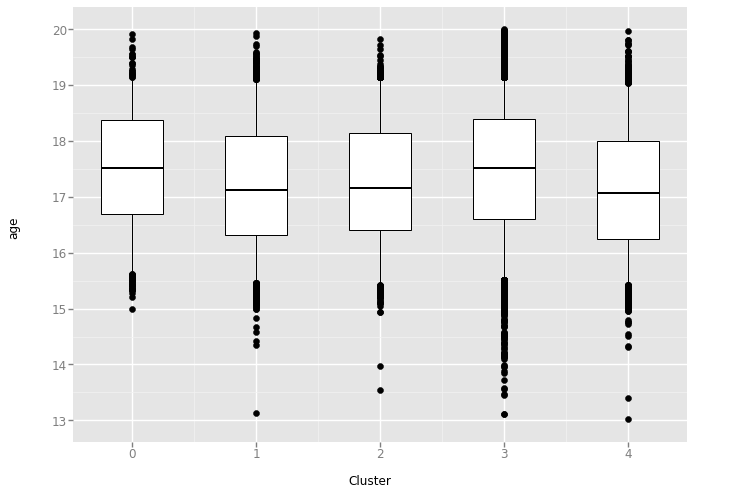

<ggplot: (16471728)>

In [39]:
ggplot(aes(x="Cluster",y="age"),data=data)+geom_boxplot()